# Imports
Numpy import for array processing, python doesn’t have built in array support. The feature of working with native arrays can be used in python with the help of numpy library.

Pandas is a library of python used for working with tables, on importing the data, mostly data will be of table format, for ease manipulation of tables pandas library is imported

Matplotlib is a library of python used to plot graphs, for the purpose of visualizing the results we would be plotting the results with the help of matplotlib library.

Math import is just used to square the numerical values

FuncAnimation is to create a animation which shows how the line fits with the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from matplotlib.animation import FuncAnimation

# Reading the dataset from data
In this line of code using the read_excel method of pandas library, the dataset has been imported from data folder and stored in dataset variable.

In [2]:
# Reading the dataset from data
dataset = pd.read_csv(r'..\\data\\auto_insurance.csv')

On viewing the dataset, it contains of two columns X and Y where X is dependent variable and Y is Independent Variable.

In [3]:
dataset.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


# Creating Dependent and Independent variables
The X Column from the dataset is extracted into an X variable of type numpy, similarly the y variable
X is an independent variable 
Y is dependent variable Inference

In [4]:
X = dataset['X'].values
y = dataset['Y'].values

On execution of first line would result in a pandas Series Object
On using values attribute it would result in an numpy array

In [5]:
print(type(dataset['X']))
print(type(dataset['X'].values))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


# Visualizing the data 
The step is to just see how the dataset is 
On visualization the data would appear something like this
The X and Y attributes would vary based on dataset.
Each point on the plot is a data point showing the respective Number of Claims on x-axis and Total Payment on y-axis

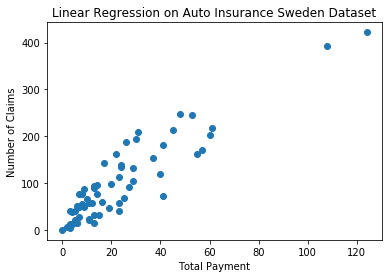

In [6]:
title='Linear Regression on <Dataset>'
x_axis_label = 'X-value < The corresponding attribute of X in dataset >'
y_axis_label = 'y-value < The corresponding attribute of X in dataset >'
title='Linear Regression on Auto Insurance Sweden Dataset'
x_axis_label = "Total Payment"
y_axis_label = "Number of Claims"

plt.scatter(X,y)
plt.title(title)
plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)
plt.show()

# Splitting the data into training set and test set
We are splitting the whole dataset into training and test set where training set is used for fitting the line to data and test set is used to check how good the line if for the data.

In [7]:
# Splitting the data into training set and test set
X_train,X_test = np.split(X,indices_or_sections = [int(len(X)*0.8)])
y_train,y_test = np.split(y,indices_or_sections = [int(len(X)*0.8)])

# Functions for caluculation of gradient descent

# Function to caluculate mean square error
This function takes `slope`,`intercept`,`x_data` and `y_data` and tries to caluculate error between the depent varible and independent varibles based on he mean square error formula

$$mse = \frac{1}{n}\displaystyle\sum_{i=1}^{n}(y_a-y_p)^2$$
where,<br>
$y_a$ is y actual (ground truth)<br>
$y_p$ is y predicted (value predicted with the given slope and intercept values

In [8]:
def mean_square_error(slope,intercept,x_data,y_data):
    n = len(x_data)
    sum_of_squares = 0
    for i in range(n):
        y_pred = x_data[i]*slope+intercept
        y_actual = y_data[i]
        sum_of_squares += (y_actual - y_pred)**2  
        
    mean_square_error = math.sqrt(sum_of_squares/n)
    return mean_square_error

# Function to caluculate Gardient of slope at each intermidiatory iteration
This function is to caluculate the first order drivates of the function. This first order derivates are caluculated at every  iteration of a the function.<br>

mse is the loss function and it is sappose to be reduced . In order to reduce it we need to take a gradient step towards the minimum and the direction in which to take step is given by gradients. So we caluculate gradients.<br>
The partial derivative of mse with respective slope is...<br>
$$
 \frac{\partial}{\partial m} =  \frac{1}{n} \displaystyle\sum_{i=1}^{n} -x_i (y_i- (m*x_i+c))
$$
where <br>
m is slope <br>
c is intercept <br>
$x_i$ is independent varible <br>
$y_i$ is dependent varible (ground truth) <br>

In this function we iterate over all the data points to attain the gradient of slope for the given slope and intercept

In [9]:
def gradient_slope(slope,intercept,x_data,y_data):
    n = len(x_data)
    sum_of_gradients = 0
    for i in range(n):
        y_pred = x_data[i]*slope + intercept
        y_actual = y_data[i]
        sum_of_gradients += x_data[i]*(y_actual-y_pred)
    sum_of_gradients = -1*sum_of_gradients
    gradient_slope = sum_of_gradients*(2/n)
    return gradient_slope

# Function to caluculate Gardient of intercept at each intermidiatory iteration 

This function is to caluculate the first order drivates of the function. This first order derivates are caluculated at every  iteration of a the function.   mse is the loss function and it is sappose to be reduced.    

In order to reduce it we need to take a gradient step towards the minimum and the direction in which to take step is given by gradients. So we caluculate gradients.<br>
The partial derivative of mse with respective intercept is...<br>
$$
 \frac{\partial}{\partial m} =  \frac{1}{n} \displaystyle\sum_{i=1}^{n} -(y_i- (m*x_i+c))
$$
where <br>
m is slope <br>
c is intercept <br>
$x_i$ is independent varible <br>
$y_i$ is dependent varible (ground truth) <br>

In this function we iterate over all the data points to attain the gradient of intercept for the given slope and intercept

In [10]:
def gradient_intercept(slope,intercept,x_data,y_data):
    n = len(x_data)
    sum_of_gradients = 0
    for i in range(n):
        y_pred = x_data[i]*slope +intercept
        y_actual = y_data[i]
        sum_of_gradients += -1 *(y_actual-y_pred)
    sum_of_gradients = -1*sum_of_gradients
    gradient_intercept = sum_of_gradients*(2/n)
    return gradient_intercept

# Gradient Decent function
This function performces gradient descent optimaization for the given epochs withe the given learning rate. Gradient decent is an optimization algoithm used to optimize the given loss function by caluculating the first order derivatives of the varibles in the function and adjusting the varibles with the help of gradients such that the loss function would attain a minimum value.  
Gradient Decent is a first order optimizaion function.   

Args :   
`x_data` :independent varible datapoints   
`y_data` :dependent varible datapoints    
`epochs` :number of times the algorithms need to iterate over the entire data   
`learning_rate` : the magnitude at which the gradient steps to be taken to attain the minimum value of funciton.   
`initial_slope` : staring value of the slope varible   
`initial_intercept`  : starting value of the intercept varible  
Returns: a tuple     
`slope` : final slope value.  
`intercept`: final intercept value.  

Line5,6 : slope and intercept values are initalized with intial values.  
Line7 : iterating over epochs.  
Line 8,9 : updating the varibles with the magnitude of learning rate multiplied with gradient values.   
Line 10,11 : mean square loss is caluculated and printed.  
Line 12,13,14 : varibles are appended into history list for further plotting and visulization.  

In [11]:
slope_history = []
intercept_history = []
loss_history = []
def gradient_decent(x_data,y_data,epochs,learning_rate,initial_slope,initial_intercept):
    slope = initial_slope
    intercept = initial_intercept
    for epoch in range(epochs):
        slope  = slope - learning_rate*(gradient_slope(slope,intercept,x_data,y_data))
        intercept = intercept - learning_rate*(gradient_intercept(slope,intercept,x_data,y_data))
        loss = mean_square_error(slope,intercept,x_data,y_data)
        print("The loss obtained is %0.2f "%(loss))
        loss_history.append(loss)
        slope_history.append(slope)
        intercept_history.append(intercept)
    return (slope,intercept)

# Training 
# Hyperparameters
Here we initial all the hyperparameters and run to gradient decent and make changes to hyperparmeters until the funtion reduces its loss.  
First plot visualize the loss value.  
Second plot to visualise the variation in slope and intercept values.  

The loss obtained is 124.91 
The loss obtained is 122.15 
The loss obtained is 119.46 
The loss obtained is 116.84 
The loss obtained is 114.28 
The loss obtained is 111.79 
The loss obtained is 109.36 
The loss obtained is 107.00 
The loss obtained is 104.69 
The loss obtained is 102.44 
The loss obtained is 100.25 
The loss obtained is 98.12 
The loss obtained is 96.04 
The loss obtained is 94.02 
The loss obtained is 92.05 
The loss obtained is 90.13 
The loss obtained is 88.26 
The loss obtained is 86.44 
The loss obtained is 84.67 
The loss obtained is 82.95 
The loss obtained is 81.27 
The loss obtained is 79.64 
The loss obtained is 78.05 
The loss obtained is 76.50 
The loss obtained is 75.00 
The loss obtained is 73.54 
The loss obtained is 72.12 
The loss obtained is 70.74 
The loss obtained is 69.40 
The loss obtained is 68.09 
The loss obtained is 66.82 
The loss obtained is 65.59 
The loss obtained is 64.40 
The loss obtained is 63.23 
The loss obtained is 62.11 
The loss 

The loss obtained is 31.03 
The loss obtained is 31.03 
The loss obtained is 31.03 
The loss obtained is 31.03 
The loss obtained is 31.03 
The loss obtained is 31.03 
The loss obtained is 31.03 
The loss obtained is 31.03 
The loss obtained is 31.03 
The loss obtained is 31.03 
The loss obtained is 31.03 
The loss obtained is 31.03 
The loss obtained is 31.03 
The loss obtained is 31.03 
The loss obtained is 31.04 
The loss obtained is 31.04 
The loss obtained is 31.04 
The loss obtained is 31.04 
The loss obtained is 31.04 
The loss obtained is 31.04 
The loss obtained is 31.04 
The loss obtained is 31.04 
The loss obtained is 31.04 
The loss obtained is 31.04 
The loss obtained is 31.04 
The loss obtained is 31.04 
The loss obtained is 31.04 
The loss obtained is 31.04 
The loss obtained is 31.04 
The loss obtained is 31.04 
The loss obtained is 31.04 
The loss obtained is 31.04 
The loss obtained is 31.04 
The loss obtained is 31.04 
The loss obtained is 31.04 
The loss obtained is

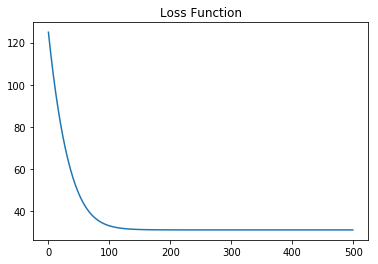

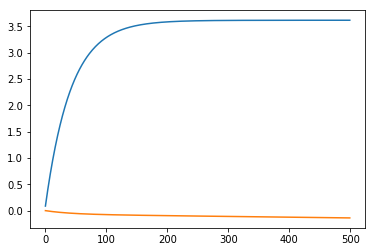

In [12]:
epochs = 500
learning_rate = 0.00001
initial_slope = 0
initial_intercept = 0

(slope,intercept) = gradient_decent(X_train,y_train,epochs = epochs,learning_rate=learning_rate,initial_slope = initial_slope,initial_intercept =initial_intercept)

# The plot to inspect the decrease in loss
plt.title("Loss Function")
plt.plot(loss_history)
plt.show()


# The plot to inspect the variation in slope and intercept
plt.plot(slope_history)
plt.plot(intercept_history)
plt.show()
     

# Predicting the Results
based on the obtained slope and intercept values we are precting the values for the test set data.

In [13]:
m = slope
c = intercept

# Predicting the Results
y_pred = X_test*m + c

# Visualizing the Results
As we have predicted the y-values for a set of x-values we are visualizing the results to check how good did our line fit for our predictions.
The plot shows the red points are the data points are actual values where the blue line is the predictions.

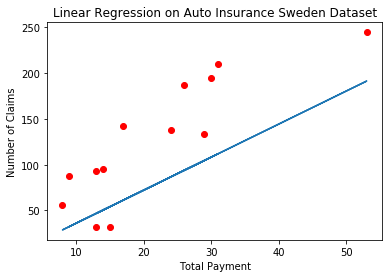

In [14]:
# Visualizing the Results
plt.scatter(X_test,y_test,c='red')
plt.plot(X_test,y_pred)

plt.title(title)
plt.xlabel(x_axis_label)
plt.ylabel(y_axis_label)
plt.show()

# Animation of Gradient Descent
This animation to show how on each iteration the line is trying to fit the data. 
`init`: this function to initialize all the values.  
`update`: this funciton to update all the values of plot for each frame.  
> Note: on running the code snippet `.gif` file would be created in the current working directory

In [ ]:

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = ax.plot([], [], 'b', animated=True)
sc = plt.scatter(X_test,y_test,c='red',animated=True)

def init():
    ax.set_title(title)
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    ax.set_xlim(min(X_test)-10, max(X_test)+10)
    ax.set_ylim(min(y_test)-10, max(y_test)+10)
    return ln,

def update(frame):
    i = frame 
    m = slope_history[i]
    c = intercept_history[i]   
    y_pred = X_test*m + c
    loss = mean_square_error(m,c,X_test,y_pred)
    ax.text(2,3,loss)
    ln.set_data(X_test, y_pred)
    
anim = FuncAnimation(fig, update, frames=range(len(slope_history)),init_func=init)
anim.save('gradient_descent.gif', fps=30)
plt.show()
print('gif is created')

MovieWriter ffmpeg unavailable.
